### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

### 2. Load the `customer_value_analysis.csv` into the variable `customer_df`.

In [2]:
customer_df = pd.read_csv("files_for_lab/customer_value_analysis.csv")

### 3. First look at its main features (`head`, `shape`, `info`).

In [3]:
display(customer_df.head())
print()
print('Shape:') 
display(customer_df.shape)
print()
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize



Shape:


(9134, 24)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   

None

### 4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).

In [4]:
def replace_column_lower(df:pd.DataFrame, replace:str, replaced_by:str)-> pd.DataFrame:
    '''
    replaceing in every column the variable "replace" with the var "replaced_by" and lower the letters.
    
    '''
    col_rename = []

    for col in df.columns:
        col_rename.append(col.lower().replace(replace,replaced_by))
    
    df.columns = col_rename      
    return df

In [5]:
def column_rename(df:pd.DataFrame, column_name:str, replaced_by:str)-> pd.DataFrame:    
    '''
    replacing the column name 
    '''
    df = df.rename(columns={column_name:replaced_by})
    return df

In [6]:
def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    '''
    set all columns to lowercase letters and replace spaces with underscore.
    Rename the column 'st'
    '''
    df = replace_column_lower(df," ","_")
    df = column_rename(df,'st','state')
    return df

In [7]:
customer_df = clean_columns(customer_df)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change the type of `effective_to_date` column to DateTime format.

In [8]:
def change_object_to_datetime(df:pd.DataFrame, col:str) -> pd.DataFrame:
    '''
    chancing the type of a object column to datetime and the invalid vallues will be set as NaT.
    '''
    if df[col].dtype == 'O':
        df[col] = pd.to_datetime(df[col], errors='coerce')
        return df
    else:
        pass

In [9]:
change_object_to_datetime(customer_df, 'effective_to_date')
customer_df[['effective_to_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   effective_to_date  9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


C:\Users\schue\AppData\Local\Temp\ipykernel_30608\148275388.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


### 6. Check `NaN` values per column.

In [10]:
customer_df.isna().sum()/customer_df.shape[0]

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

#### There are no missing values.

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [12]:
def num_cat_dataframe(df:pd.DataFrame) -> pd.DataFrame:
    df_num = df.select_dtypes(np.number)
    df_cat = df.select_dtypes(object)
    return df_num, df_cat

In [13]:
customer_df_num,customer_df_cat =num_cat_dataframe(customer_df)
display(customer_df_num.head())
display(customer_df_cat.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 8. Drop any ID column.

In [14]:
customer_df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [15]:
customer_df_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### There is no ID column.

### 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

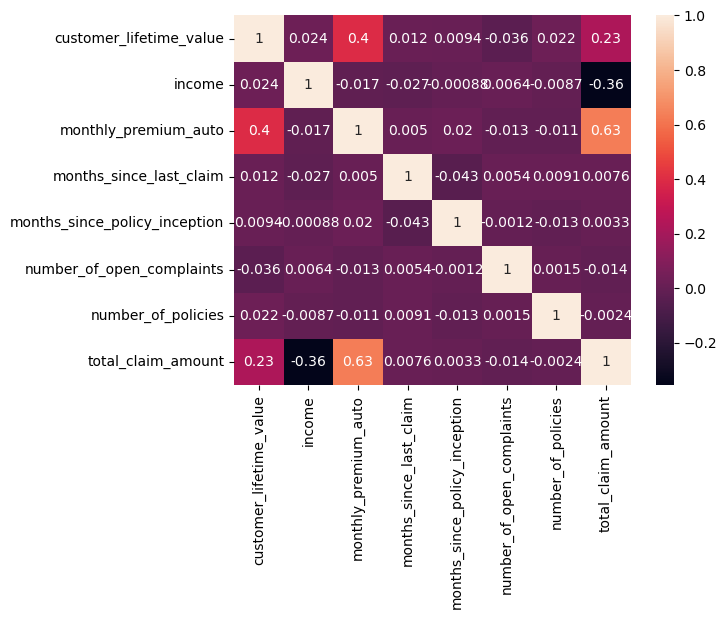

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations_matrix = customer_df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### Monthly premium auto and total claim amount has the highest correlation with 0.63. It's make sense because the money that the customer is able to claim in total has a high dependency to the amount of money which the customer paying every month as a premium.

### 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df. 

In [17]:
df = customer_df_num
def continuous_discrete_col(df:pd.DataFrame, threshold:int):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    for col in df.columns:
       
        n = df[col].nunique()
        if n <= threshold:
            discrete_df = pd.concat([discrete_df,df[[col]]], axis=1)

        else:
            continuous_df = pd.concat([continuous_df,df[[col]]], axis=1)
    
    return discrete_df, continuous_df

In [18]:
discrete_df, continuous_df = continuous_discrete_col(customer_df_num, 36)
display(discrete_df.head())
display(continuous_df.head())

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


### 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 

#### I think to use a barplot here doesn't make much sense because we use only one value on the y-axis and its very hard to see the max and min values. Better would be a boxplot i think.

In [19]:
def barplot_for_every_column(df:pd.DataFrame):
    rows = df.shape[1]
    n = 0
    fig, ax = plt.subplots(rows,1, figsize=(16,16))
    for col in df.columns:
        sns.barplot(y=col, data = df, ax = ax[n]);
        n += 1
    
    plt.tight_layout()
    plt.show()

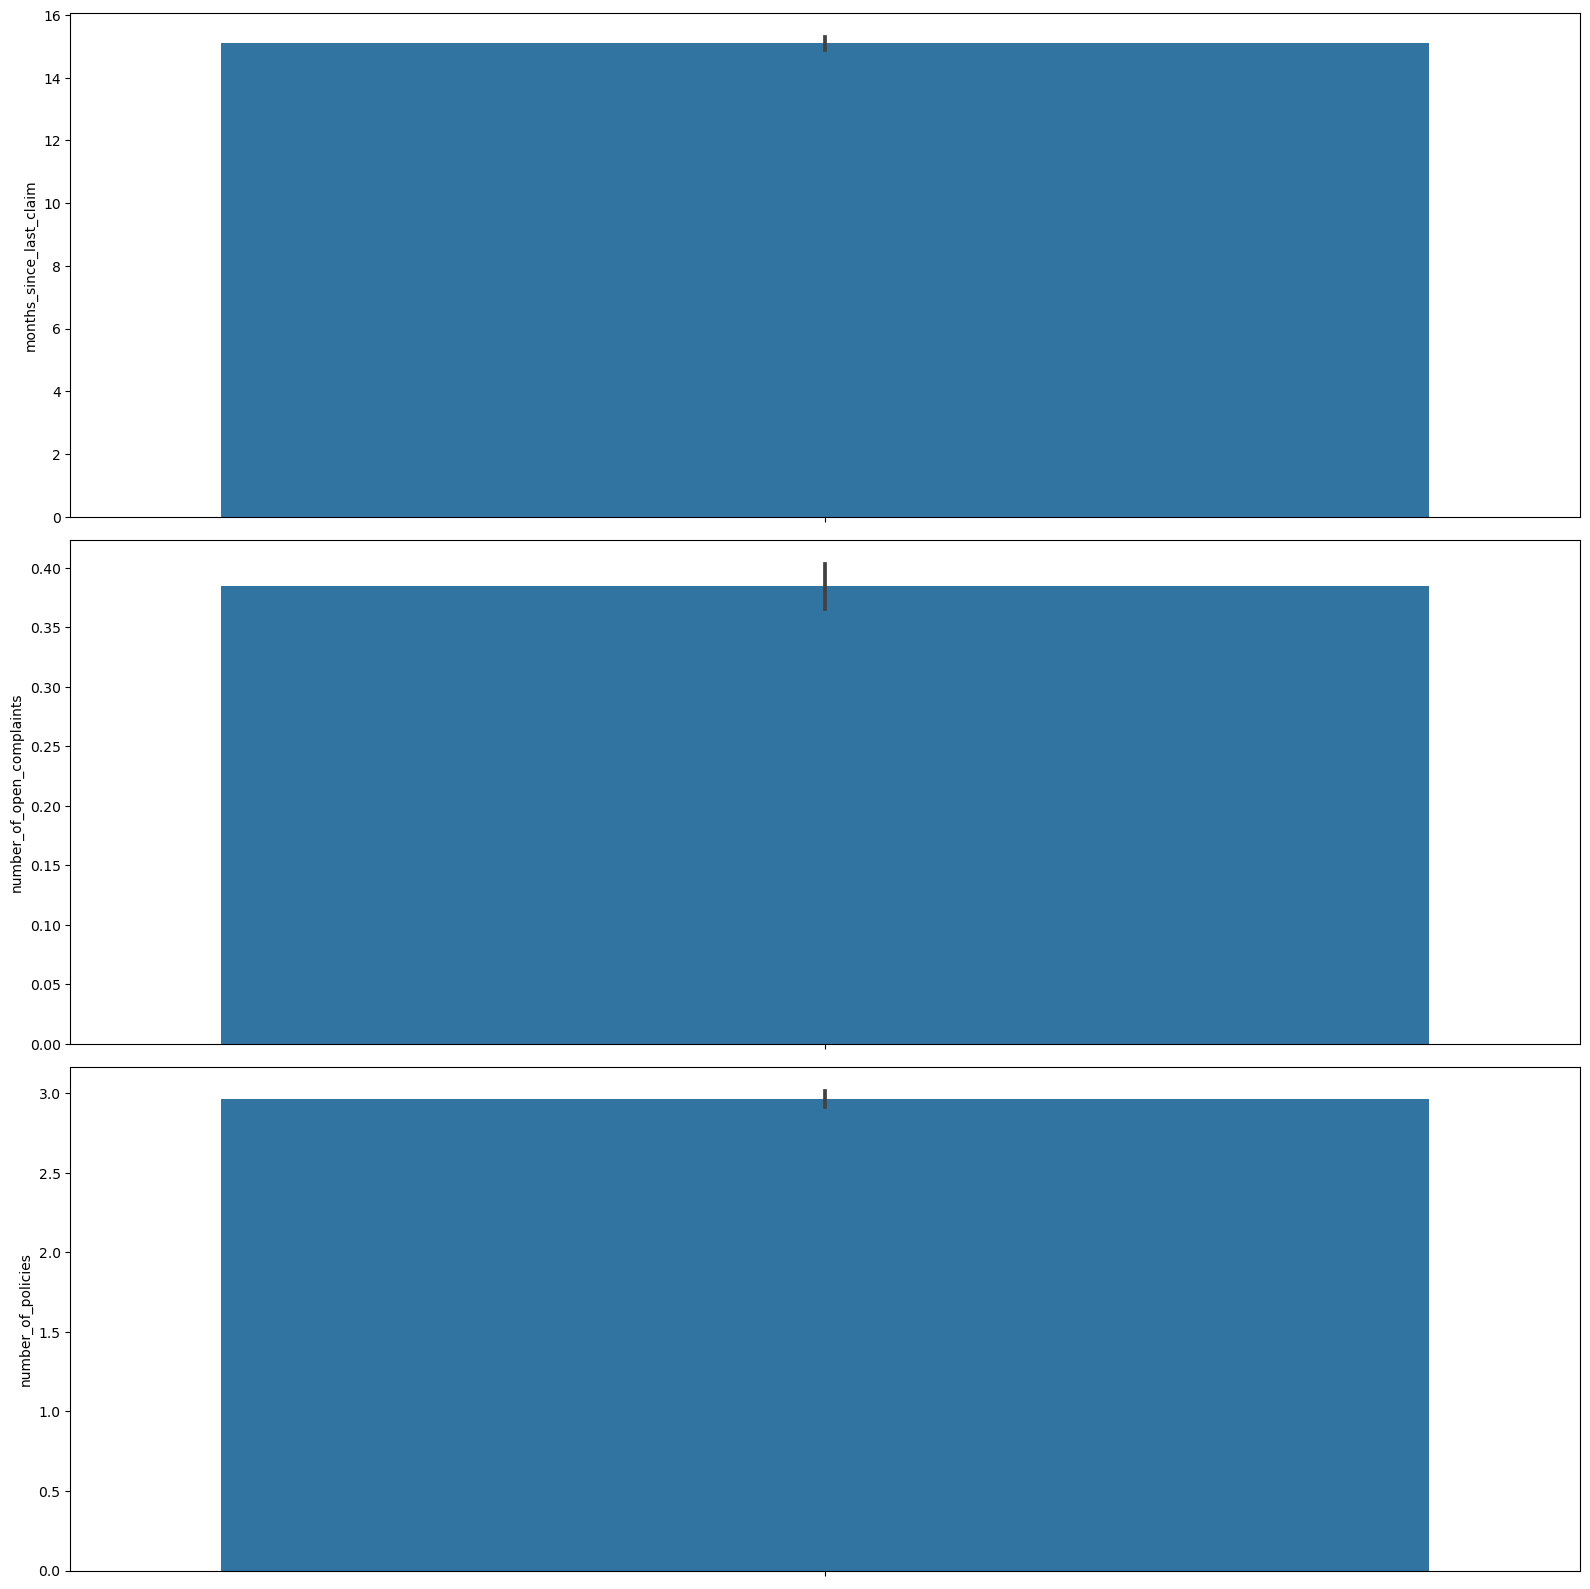

In [20]:
barplot_for_every_column(discrete_df)

### 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [21]:
def histplot_for_every_column(df:pd.DataFrame):
    rows = df.shape[1]
    n = 0
    fig, ax = plt.subplots(rows,1, figsize=(16,16))
    for col in df.columns:
        sns.histplot(x=col, data = df, ax = ax[n]);
        
        n += 1
    plt.tight_layout()
    plt.show()

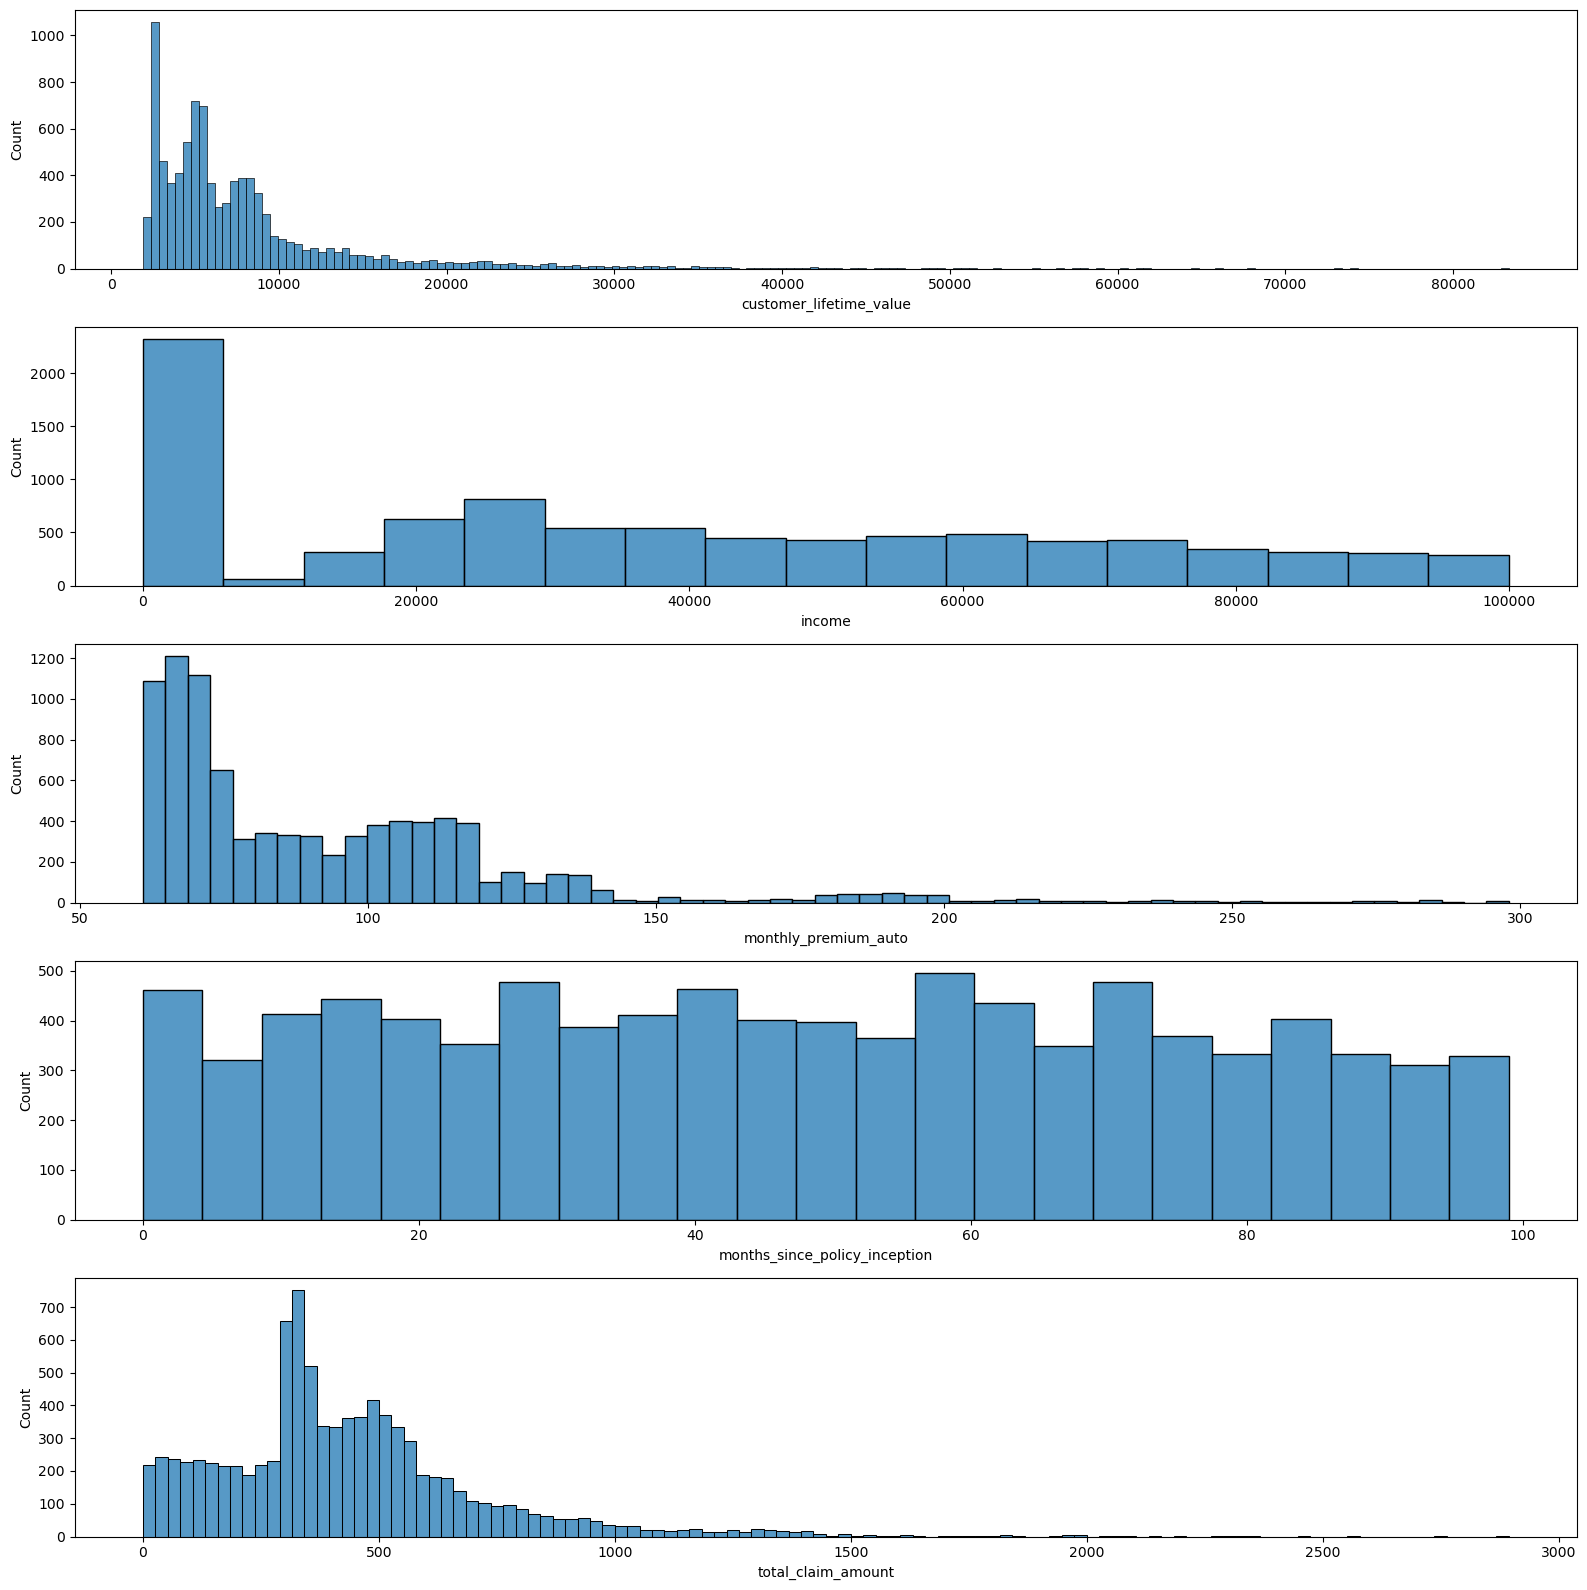

In [22]:
histplot_for_every_column(continuous_df)

### 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

#### I would apply a transformer to every column which is heavly skewed like customer lifetime value, monthly premium auto and total claim amount.

#### The columns income seems to have different ranges. There are a lot of customer with an income of zero. The other customer seems to be quite uniform distributed. One way could be to seperate them into two classes. So to make a prediction for y for the class A (income=0) and class B (income>0).

#### After appling the transform i would scale every column.

### 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

#### A good way to see outliers would be a boxplot.

In [23]:
def boxplot_for_every_column(df:pd.DataFrame):
    rows = df.shape[1]
    n = 0
    fig, ax = plt.subplots(rows,1, figsize=(16,16))
    for col in df.columns:
        sns.boxplot(x=col, data = df, ax = ax[n]);
        n += 1
    
    plt.tight_layout()
    plt.show()

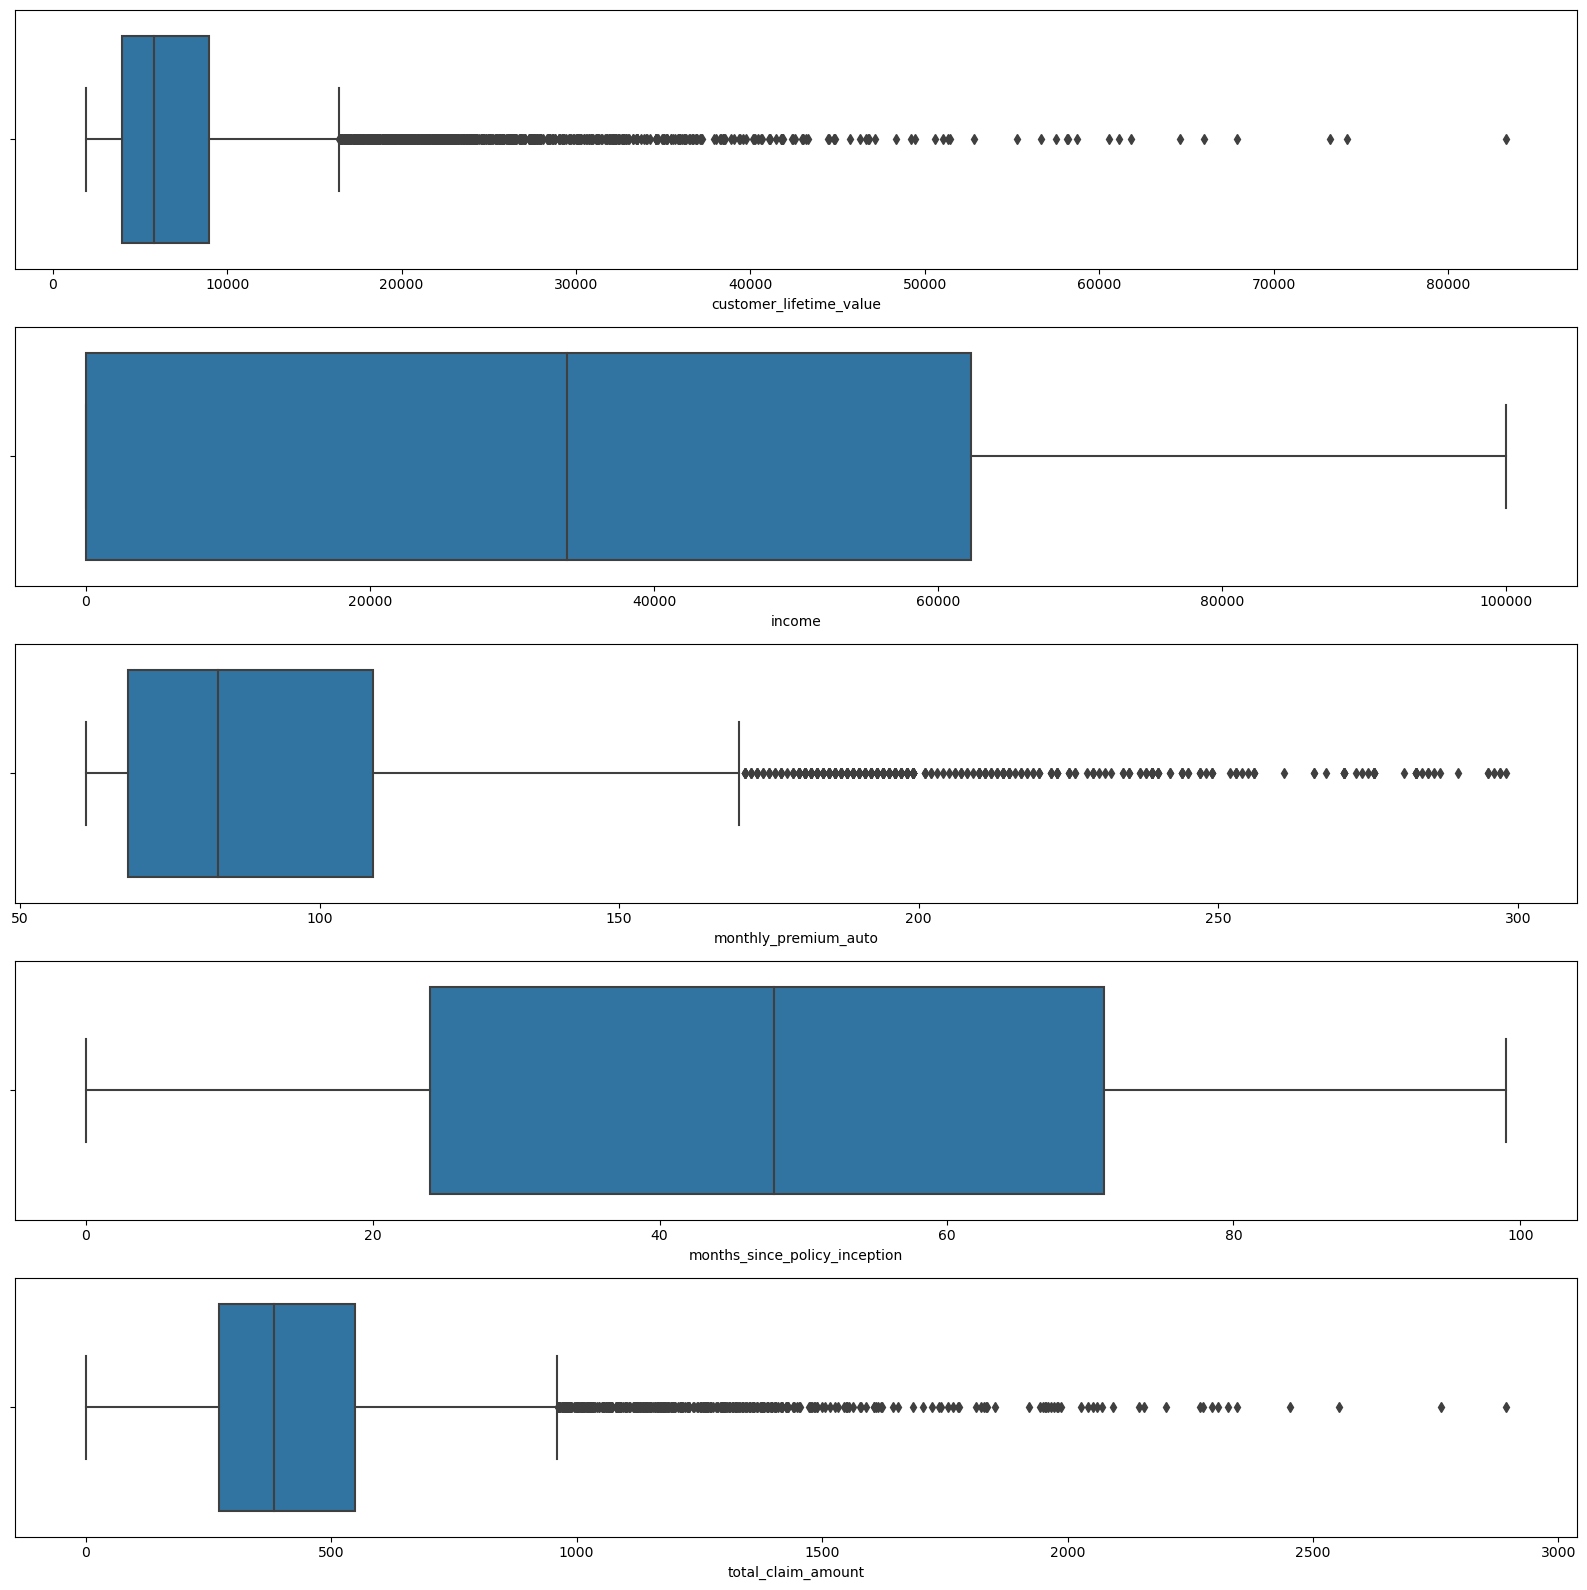

In [24]:
boxplot_for_every_column(continuous_df)

# Lab cleaning categorical columns

### 1. Define a function that given a pandas DataFrame as input creates a **seaborn countplot** of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [25]:
def countplot_for_every_column(df:pd.DataFrame):
    rows = df.shape[1]
    n = 0
    fig, ax = plt.subplots(rows,1, figsize=(10,50))
    for col in df.columns:
        values = df[col].nunique()
        if values < 6:
            sorted_categories = df[col].value_counts().index
            sns.countplot( data = df, x=col , ax = ax[n], order=sorted_categories)
            ax[n].set_title(col)
            n += 1
        else:
            sorted_categories = df[col].value_counts().index
            sns.countplot( data = df, y=col , ax = ax[n], order=sorted_categories)
            ax[n].set_title(col)
            n += 1
    plt.tight_layout()
    plt.show()

In [26]:
#countplot_for_every_column(customer_df_cat)

### 2. `policy_type` and `policy` columns are redundant, and what's worse `policy` column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column `policy_type` and transform the column `policy` to three possible values: L1, L2, and L3 using a function. 

In [27]:
customer_df_cat = customer_df_cat.drop('policy_type', axis=1)
customer_df_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
def replace(df:pd.DataFrame, col:str, replace:str, replaced_by:str)-> pd.DataFrame:
    '''
    replace a string for another string
    ''' 
    if df[col].dtype == 'O':
        df[col] = df[col].str.replace(replace,replaced_by)
        return df

In [29]:
replace(customer_df_cat,"policy", 'Personal L3', 'L3')
replace(customer_df_cat,"policy", 'Corporate L3', 'L3')
replace(customer_df_cat,"policy", 'Special L3', 'L3')
replace(customer_df_cat,"policy", 'Personal L2', 'L2')
replace(customer_df_cat,"policy", 'Corporate L2', 'L2')
replace(customer_df_cat,"policy", 'Special L2', 'L2')
replace(customer_df_cat,"policy", 'Personal L1', 'L1')
replace(customer_df_cat,"policy", 'Corporate L1', 'L1')
replace(customer_df_cat,"policy", 'Special L1', 'L1')

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


In [30]:
customer_df_cat['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

### 3. Time dependency analysis. Use a seaborn line plot using the column `effective_to_date` to see if `total_claim_amount` is bigger at some specific dates. Use a figsize=(10,10) 

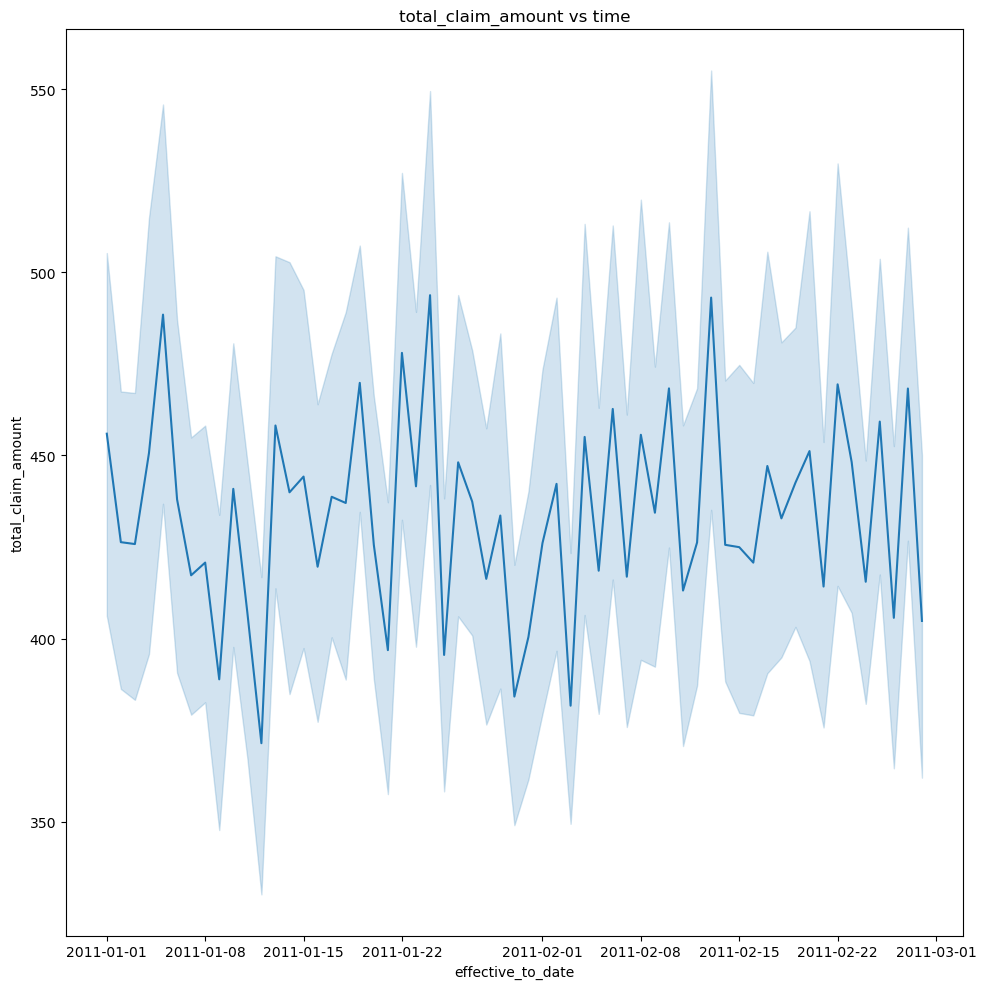

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,10)) 
sns.lineplot( data = customer_df, x="effective_to_date" , y="total_claim_amount", ax = ax)
ax.set_title("total_claim_amount vs time")        
plt.tight_layout()
plt.show()

### 4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
* `day` with the day number of `effective_to_date`
* `day_name` with the day NAME of `effective_to_date`
* `week` with the week of `effective_to_date`
* `month` with the month NAME of `effective_to_date`
* `total_claim_amount` with `total_claim_amount` 

In [32]:
time_analyze= pd.DataFrame(columns=['total_claim_amount','day','day_name','week','month'])
time_analyze['total_claim_amount']=customer_df['total_claim_amount']
time_analyze['day'] = customer_df['effective_to_date'].dt.strftime('%w')
time_analyze['day_name'] = customer_df['effective_to_date'].dt.strftime('%A')
time_analyze['week'] = customer_df['effective_to_date'].dt.strftime('%W')
time_analyze['month'] = customer_df['effective_to_date'].dt.strftime('%B')
time_analyze

,total_claim_amount,day,day_name,week,month
0,384.811147,4,Thursday,08,February
1,1131.464935,1,Monday,05,January
2,566.472247,6,Saturday,07,February
3,529.881344,4,Thursday,03,January
4,138.130879,4,Thursday,05,February
...,...,...,...,...,...
9129,198.234764,4,Thursday,06,February
9130,379.200000,6,Saturday,06,February
9131,790.784983,0,Sunday,05,February
9132,691.200000,4,Thursday,05,February


### 5. Compute the total `target` column aggregated `day_name` rounded to two decimals and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_days)`
 

In [33]:
list_of_correct_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
time_pivot_sum = pd.pivot_table(time_analyze,index='day_name',values='total_claim_amount', aggfunc=sum).round(2)
display(time_pivot_sum)
time_pivot_sum = time_pivot_sum.reindex(index=list_of_correct_days).reset_index()
display(time_pivot_sum)

,total_claim_amount
day_name,
Friday,533658.79
Monday,655689.71
Saturday,608060.10
Sunday,581655.66
Thursday,541820.80
Tuesday,502518.93
Wednesday,541563.05


,day_name,total_claim_amount
0,Monday,655689.71
1,Tuesday,502518.93
2,Wednesday,541563.05
3,Thursday,541820.80
4,Friday,533658.79
5,Saturday,608060.10
6,Sunday,581655.66


### 6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

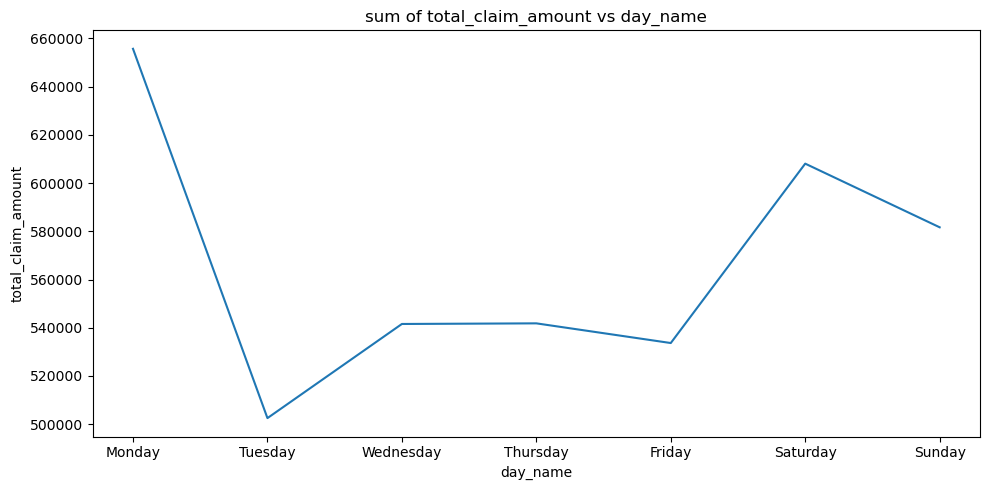

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
sns.lineplot( data = time_pivot_sum, x="day_name" , y="total_claim_amount", ax = ax)
ax.set_title("sum of total_claim_amount vs day_name")        
plt.tight_layout()
plt.show()

### 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_values)`
 

#### already done

### 9. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [35]:
list_of_correct_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
time_pivot_median = pd.pivot_table(time_analyze,index='day_name',values='total_claim_amount', aggfunc=np.median).round(2)
time_pivot_median_ranked_values = time_pivot_median.reset_index().sort_values('total_claim_amount', ascending=False)
time_pivot_median = time_pivot_median.reindex(index=list_of_correct_days).reset_index()
display(time_pivot_median)

,day_name,total_claim_amount
0,Monday,385.74
1,Tuesday,378.49
2,Wednesday,392.24
3,Thursday,395.33
4,Friday,371.80
5,Saturday,379.20
6,Sunday,383.72


### 10. Plot the median "target" by day of the week name using a seaborn barplot

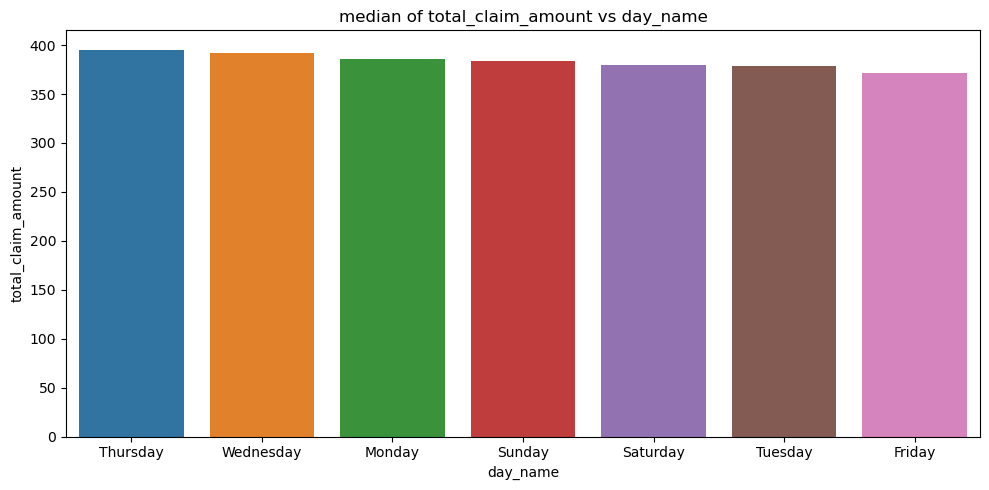

In [36]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
sns.barplot( data = time_pivot_median_ranked_values, x="day_name" , y="total_claim_amount", ax = ax)
ax.set_title("median of total_claim_amount vs day_name")        
plt.tight_layout()
plt.show()

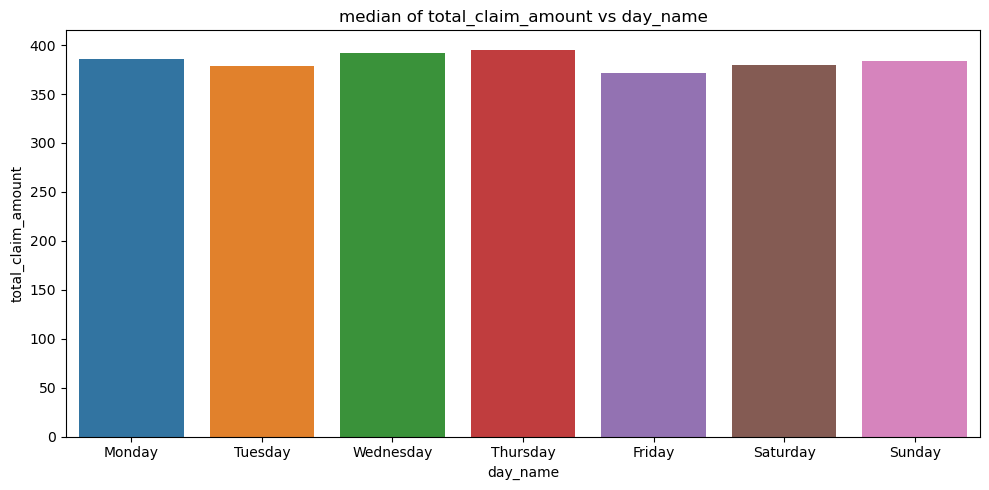

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
sns.barplot( data = time_pivot_median, x="day_name" , y="total_claim_amount", ax = ax)
ax.set_title("median of total_claim_amount vs day_name")        
plt.tight_layout()
plt.show()

### 11. What can you conclude from this analysis?

#### Even the aggregated sum of the total claim amount is very high for monday, the aggregated mean of the values are quite even. I can say that there should be some high value outlieres for monday and because the median is note really effected by outliers we cant see them there. We can get to the same conclusion for tuesday but here the outlieres seems to be lower values.

### 12. Compute the total `target` column aggregated `month` rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)


In [38]:
list_of_correct_days = ['January','February']
time_pivot_sum = pd.pivot_table(time_analyze,index='month',values='total_claim_amount', aggfunc=sum).round(2)
display(time_pivot_sum)
time_pivot_sum = time_pivot_sum.reindex(index=list_of_correct_days).reset_index()
display(time_pivot_sum)

,total_claim_amount
month,
February,1847824.19
January,2117142.86


,month,total_claim_amount
0,January,2117142.86
1,February,1847824.19


### 13. Can you do a monthly analysis given the output of the previous series? Why?


#### A monthly analysis makes no sense because we only have data from two month.

### 14. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).


In [39]:
def remove_outliers(df:pd.DataFrame, col:str, thr=3):
    list_index = []
    std_deviation  = df[col].std()
    mean_value = df[col].mean()
    for index, value in df[col].items():       
        if (value > mean_value + thr * std_deviation) or (value < mean_value - thr * std_deviation):
            list_index.append(index)
    df = df.drop(list_index, axis = 0)
    return df

In [40]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


### 15. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.


In [41]:
continuous_clean_df = continuous_df
continuous_clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [42]:
continuous_clean_df = continuous_df
for col in continuous_clean_df:
    continuous_clean_df = remove_outliers(continuous_clean_df, col, 3)
    print(continuous_clean_df.shape)

(8923, 5)
(8923, 5)
(8706, 5)
(8706, 5)
(8575, 5)


### 16. Concatenate the `continuous_cleaned_df`, `discrete_df`, `categorical_df`, and the relevant column of `time_df`. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using `pd.concat()`) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use `pd.dropna()` and `.reset_index()` to fix the final dataframe.


In [43]:
customer_clean = pd.concat([continuous_clean_df.drop('total_claim_amount',axis=1),discrete_df,customer_df_cat,time_analyze],axis =1)
customer_clean = customer_clean.dropna().reset_index(drop=True)
customer_clean

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,32,0,1,BU79786,Washington,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,384.811147,4,Thursday,08,February
1,6979.535903,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,No,...,L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935,1,Monday,05,January
2,12887.431650,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,566.472247,6,Saturday,07,February
3,7645.861827,0.0,106.0,65.0,18,0,7,WW63253,California,No,...,L2,Offer1,Call Center,SUV,Medsize,529.881344,4,Thursday,03,January
4,2813.692575,43836.0,73.0,44.0,12,0,1,HB64268,Washington,No,...,L1,Offer1,Agent,Four-Door Car,Medsize,138.130879,4,Thursday,05,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,18,0,2,LA72316,California,No,...,L1,Offer2,Web,Four-Door Car,Medsize,198.234764,4,Thursday,06,February
8571,3096.511217,21604.0,79.0,28.0,14,0,1,PK87824,California,Yes,...,L3,Offer1,Branch,Four-Door Car,Medsize,379.200000,6,Saturday,06,February
8572,8163.890428,0.0,85.0,37.0,9,3,2,TD14365,California,No,...,L2,Offer1,Branch,Four-Door Car,Medsize,790.784983,0,Sunday,05,February
8573,7524.442436,21941.0,96.0,3.0,34,0,3,UP19263,California,No,...,L2,Offer3,Branch,Four-Door Car,Large,691.200000,4,Thursday,05,February


### 17. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [44]:
customer_clean.columns
new_labels = ['customer_lifetime_value', 'income', 'monthly_premium_auto','months_since_policy_inception', 'months_since_last_claim','number_of_open_complaints', 'number_of_policies', 'customer', 'state','response', 'coverage', 'education', 'employmentstatus', 'gender','location_code', 'marital_status', 'policy', 'renew_offer_type','sales_channel', 'vehicle_class', 'vehicle_size','day', 'day_name', 'week', 'month', 'total_claim_amount']
customer_clean.reindex(labels=new_labels, axis=1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,BU79786,Washington,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,4,Thursday,08,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,No,...,L3,Offer3,Agent,Four-Door Car,Medsize,1,Monday,05,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,6,Saturday,07,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,WW63253,California,No,...,L2,Offer1,Call Center,SUV,Medsize,4,Thursday,03,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,HB64268,Washington,No,...,L1,Offer1,Agent,Four-Door Car,Medsize,4,Thursday,05,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,18,0,2,LA72316,California,No,...,L1,Offer2,Web,Four-Door Car,Medsize,4,Thursday,06,February,198.234764
8571,3096.511217,21604.0,79.0,28.0,14,0,1,PK87824,California,Yes,...,L3,Offer1,Branch,Four-Door Car,Medsize,6,Saturday,06,February,379.200000
8572,8163.890428,0.0,85.0,37.0,9,3,2,TD14365,California,No,...,L2,Offer1,Branch,Four-Door Car,Medsize,0,Sunday,05,February,790.784983
8573,7524.442436,21941.0,96.0,3.0,34,0,3,UP19263,California,No,...,L2,Offer3,Branch,Four-Door Car,Large,4,Thursday,05,February,691.200000


### 18. Turn the `response` column values into (Yes=1/No=0).

In [45]:
customer_clean = replace(customer_clean, "response", "Yes", "1")
customer_clean = replace(customer_clean, "response", "No", "2")
customer_clean["response"] = customer_clean["response"].astype(int)
customer_clean[["response"]]

,response
0,2
1,2
2,2
3,2
4,2
...,...
8570,2
8571,1
8572,2
8573,2


### 19. Reduce the class imbalance in `education` by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [46]:
customer_clean = replace(customer_clean, "education", "Master", "Graduate")
customer_clean = replace(customer_clean, "education", "Doctor", "Graduate")
customer_clean["education"].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

### 20. Reduce the class imbalance of the `employmentstatus` column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [47]:
customer_clean = replace(customer_clean, "employmentstatus", "Medical Leave", "Inactive")
customer_clean = replace(customer_clean, "employmentstatus", "Disabled", "Inactive")
customer_clean = replace(customer_clean, "employmentstatus", "Retired", "Inactive")
customer_clean["employmentstatus"].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

### 21. Deal with column `Gender` turning the values into (1/0).

In [48]:
customer_clean = replace(customer_clean, "gender", "M", "1")
customer_clean = replace(customer_clean, "gender", "F", "0")
customer_clean["gender"] = customer_clean["gender"].astype(int)
customer_clean["gender"].unique()

array([0, 1])

### 22. Now, deal with `vehicle_class` grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called `Luxury` leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [49]:
customer_clean = replace(customer_clean, "vehicle_class", "Sports Car", "Luxury")
customer_clean = replace(customer_clean, "vehicle_class", "Luxury SUV", "Luxury")
customer_clean = replace(customer_clean, "vehicle_class", "Luxury Car", "Luxury")
customer_clean["vehicle_class"].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

### 23. Now it's time to deal with the **categorical ordinal columns**, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [50]:
customer_clean = replace(customer_clean, "coverage", "Premium", "3")
customer_clean = replace(customer_clean, "coverage", "Extended", "2")
customer_clean = replace(customer_clean, "coverage", "Basic", "1")
customer_clean["coverage"] = customer_clean["coverage"].astype(int)
customer_clean["coverage"].unique()

array([1, 2, 3])

### 24. Encode the column `employmentstatus` as: "Employed" > "Inactive" > "Unemployed".

In [51]:
customer_clean = replace(customer_clean, "employmentstatus", "Employed", "3")
customer_clean = replace(customer_clean, "employmentstatus", "Inactive", "2")
customer_clean = replace(customer_clean, "employmentstatus", "Unemployed", "1")
customer_clean["employmentstatus"] = customer_clean["employmentstatus"].astype(int)
customer_clean["employmentstatus"].unique()

array([3, 1, 2])

### 25. Encode the column `location_code` as: "Urban" > "Suburban" > "Rural".

In [52]:
customer_clean = replace(customer_clean, "location_code", "Urban", "3")
customer_clean = replace(customer_clean, "location_code", "Suburban", "2")
customer_clean = replace(customer_clean, "location_code", "Rural", "1")
customer_clean["location_code"] = customer_clean["location_code"].astype(int)
customer_clean["location_code"].unique()

array([2, 1, 3])

### 26. Encode the column `vehicle_size` as: "Large" > "Medsize" > "Small".

In [53]:
customer_clean = replace(customer_clean, "vehicle_size", "Large", "3")
customer_clean = replace(customer_clean, "vehicle_size", "Medsize", "2")
customer_clean = replace(customer_clean, "vehicle_size", "Small", "1")
customer_clean["vehicle_size"] = customer_clean["vehicle_size"].astype(int)
customer_clean["vehicle_size"].unique()

array([2, 1, 3])

### 27. Get a dataframe with the **categorical nominal columns**

In [54]:
customer_clean.select_dtypes(object)

,customer,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day,day_name,week,month
0,BU79786,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,4,Thursday,08,February
1,QZ44356,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,1,Monday,05,January
2,AI49188,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,6,Saturday,07,February
3,WW63253,California,Bachelor,Married,L2,Offer1,Call Center,SUV,4,Thursday,03,January
4,HB64268,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,4,Thursday,05,February
...,...,...,...,...,...,...,...,...,...,...,...,...
8570,LA72316,California,Bachelor,Married,L1,Offer2,Web,Four-Door Car,4,Thursday,06,February
8571,PK87824,California,College,Divorced,L3,Offer1,Branch,Four-Door Car,6,Saturday,06,February
8572,TD14365,California,Bachelor,Single,L2,Offer1,Branch,Four-Door Car,0,Sunday,05,February
8573,UP19263,California,College,Married,L2,Offer3,Branch,Four-Door Car,4,Thursday,05,February


In [55]:
customer_clean_catnom = customer_clean[['state', 'marital_status', 'sales_channel']]
customer_clean_catnom.head()

,state,marital_status,sales_channel
0,Washington,Married,Agent
1,Arizona,Single,Agent
2,Nevada,Married,Agent
3,California,Married,Call Center
4,Washington,Single,Agent


### 28. Create a list of named `levels` which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

```python
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
```

In [56]:
level = []
for col in customer_clean_catnom:
    values = customer_clean_catnom[col].unique().tolist()
    level.append(values)
level 

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Married', 'Single', 'Divorced'],
 ['Agent', 'Call Center', 'Web', 'Branch']]

### 29. Instantiate an [sklearn OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) with drop set to `first` and categories to `levels`


In [57]:
from sklearn.preprocessing import OneHotEncoder
import pickle

encoder = OneHotEncoder(drop='first', categories=level) # The option drop='first' drops one of the possible values.
encoder.fit(customer_clean_catnom)

path = "./"
filename = "one_hot_encoder_cat_nom.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

customer_clean_catnom_ohe = encoder.transform(customer_clean_catnom).toarray()


customer_clean_catnom_ohe_df = pd.DataFrame(customer_clean_catnom_ohe, columns=encoder.get_feature_names_out(), index=customer_clean_catnom.index)



In [58]:
customer_clean_catnom_ohe_df

,state_Arizona,state_Nevada,state_California,state_Oregon,marital_status_Single,marital_status_Divorced,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8571,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8572,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8573,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
